# first Import libraries

<p>
before we start we need to import some of tools that will help us to get insights and information . first we will use pandas to work with csv files and tables , second we will use seaborn and matplotlib to make some visualize and make data easy to understand , third  we will use numpy to help use with matrix and array <br><h3> Lets Satrt..</h3>
</p>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", 300)
file_name ='kaggle_survey_2021_responses.csv'
df =pd.read_csv(file_name,sep=',',dtype='unicode')
df.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,...,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg.

<p>
after import data we see that the first row is the question and from the row with index 1 to the end of the file is the answer so we will remove all question from table and then add all to a new Table called Question to work easy with answers and also when we see the head of the table we see in the Q2 columns there is mistake in men keyword so we will replace it with corrct value  </p>

In [72]:
# Data Clean 
df['Q2'].unique() # get All unique value in cloumn
df['Q2'].replace(to_replace='Man',value='Men',inplace =True) # Edit Q2 columns by edit Men categories
QA =np.array(df.loc[0,:]) # make list of Questions  
Question = pd.DataFrame({'Question':QA}) # create A data Frame of Question
df =df.iloc[1::,:] # Delete the Question Row in Data Frame
Question

,Question
0,Duration (in seconds)
1,What is your age (# years)?
2,What is your gender? - Selected Choice
3,In which country do you currently reside?
4,What is the highest level of formal education ...
...,...
364,"In the next 2 years, do you hope to become mor..."
365,"In the next 2 years, do you hope to become mor..."
366,"In the next 2 years, do you hope to become mor..."
367,"In the next 2 years, do you hope to become mor..."


# now Story Start

first we need to know how olds of our users that make the survey and which is more men or women

first i create two this function beacuse i will use them alot this functions take data frame and columns name and xlabel and one take hue and the second not these two function craete categorical plot to the count of  column values and sort it from greate to low  

In [77]:
def plotingwithhue(dataframe,col,hue,xlb):
    value_order= np.array(dataframe[col].value_counts().sort_values(ascending=False).index)
    sns.catplot(data=dataframe,x=col,hue=hue,kind="count",order=value_order,height=15)
    plt.xlabel(xlb)
    plt.xticks(rotation=90)
    plt.show()

def plotingwithouthue(dataframe,col,xlb):
    value_order= np.array(dataframe[col].value_counts().sort_values(ascending=False).index)
    sns.catplot(data=dataframe,x=col,kind="count",order=value_order,height=15)
    plt.xlabel(xlb)
    plt.xticks(rotation=90)
    plt.show()

i use the function i declare before to see what is the big age stage in the survey 

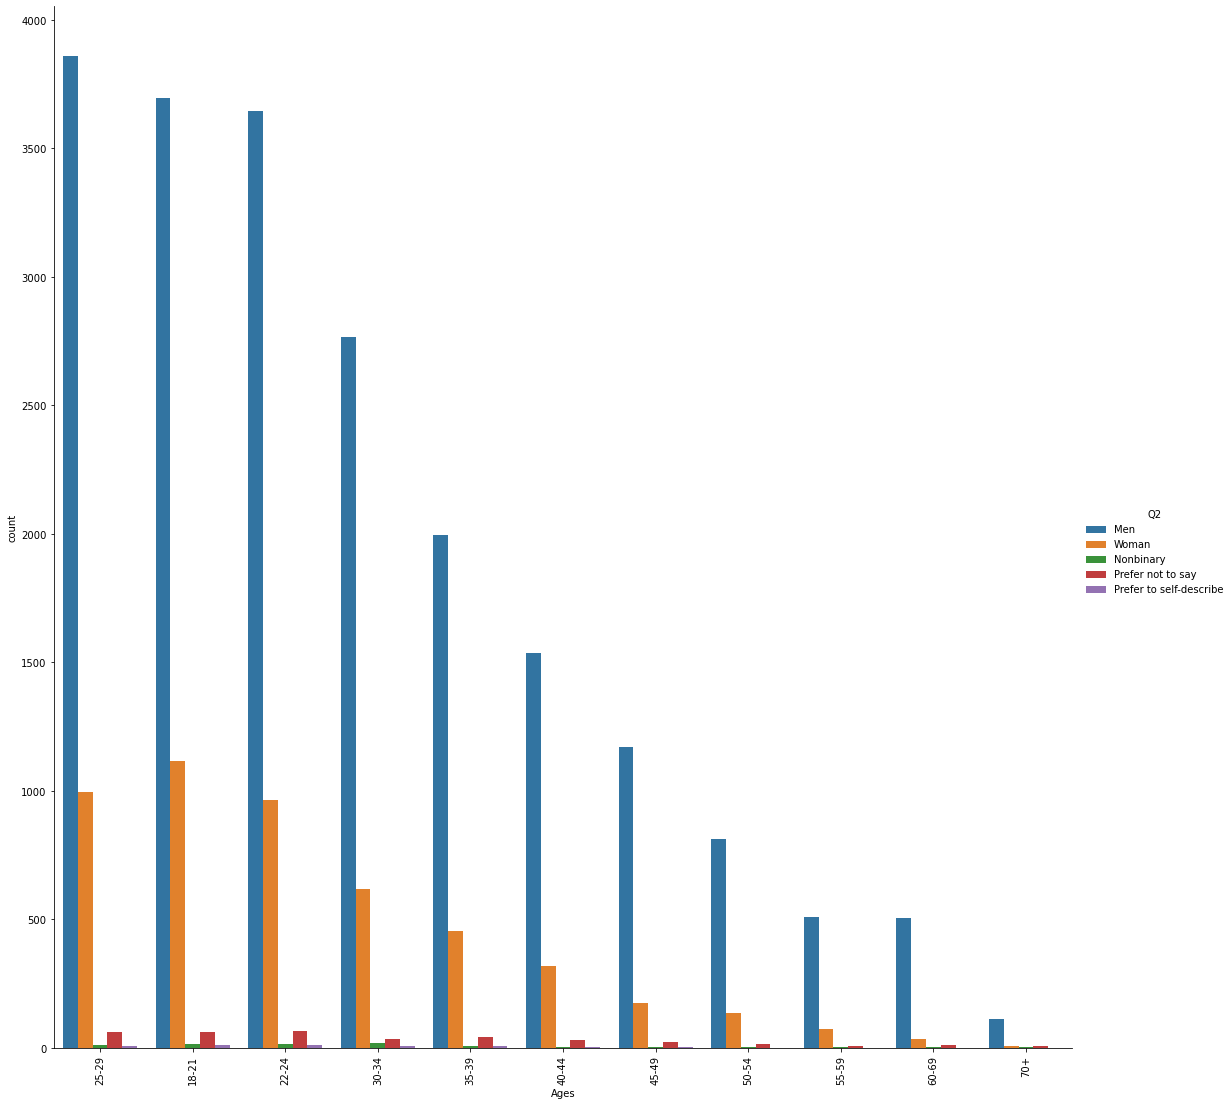

In [56]:
plotingwithhue(df,'Q1','Q2','Ages')

now we see that the bigger age stage is from 25-29 and for all age stage the men is more than women and also see from previous figure that the age from 18 to 29 is the most age in the survey make survey and  like we saw before men also higher than women

In [57]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

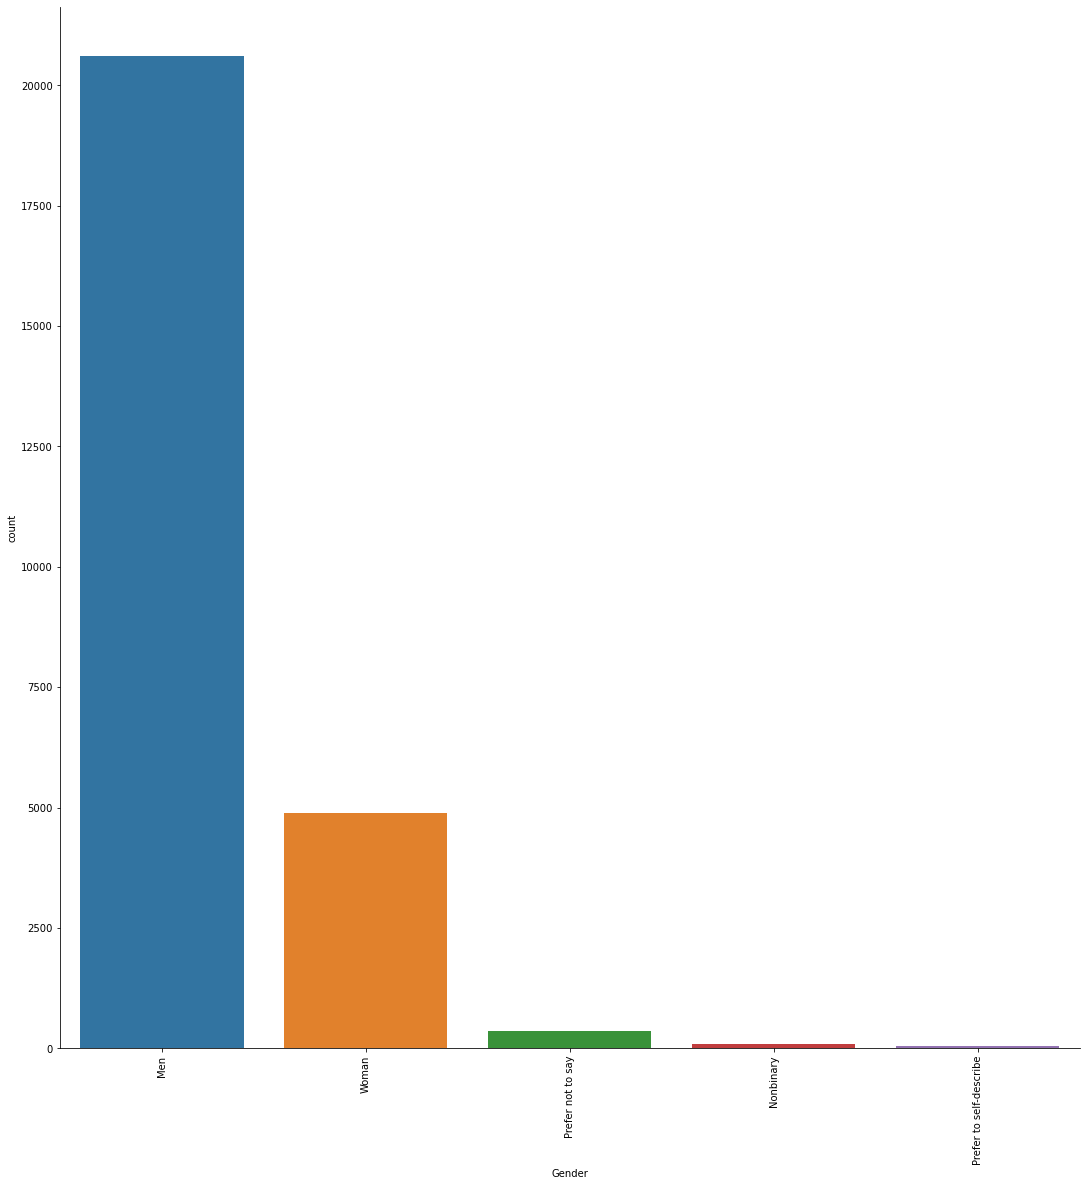

In [68]:
plotingwithouthue(df,'Q2','Gender')

##### we see that men are interested to share and submit the survey than women
mens more big big big than women

# where are most users.?

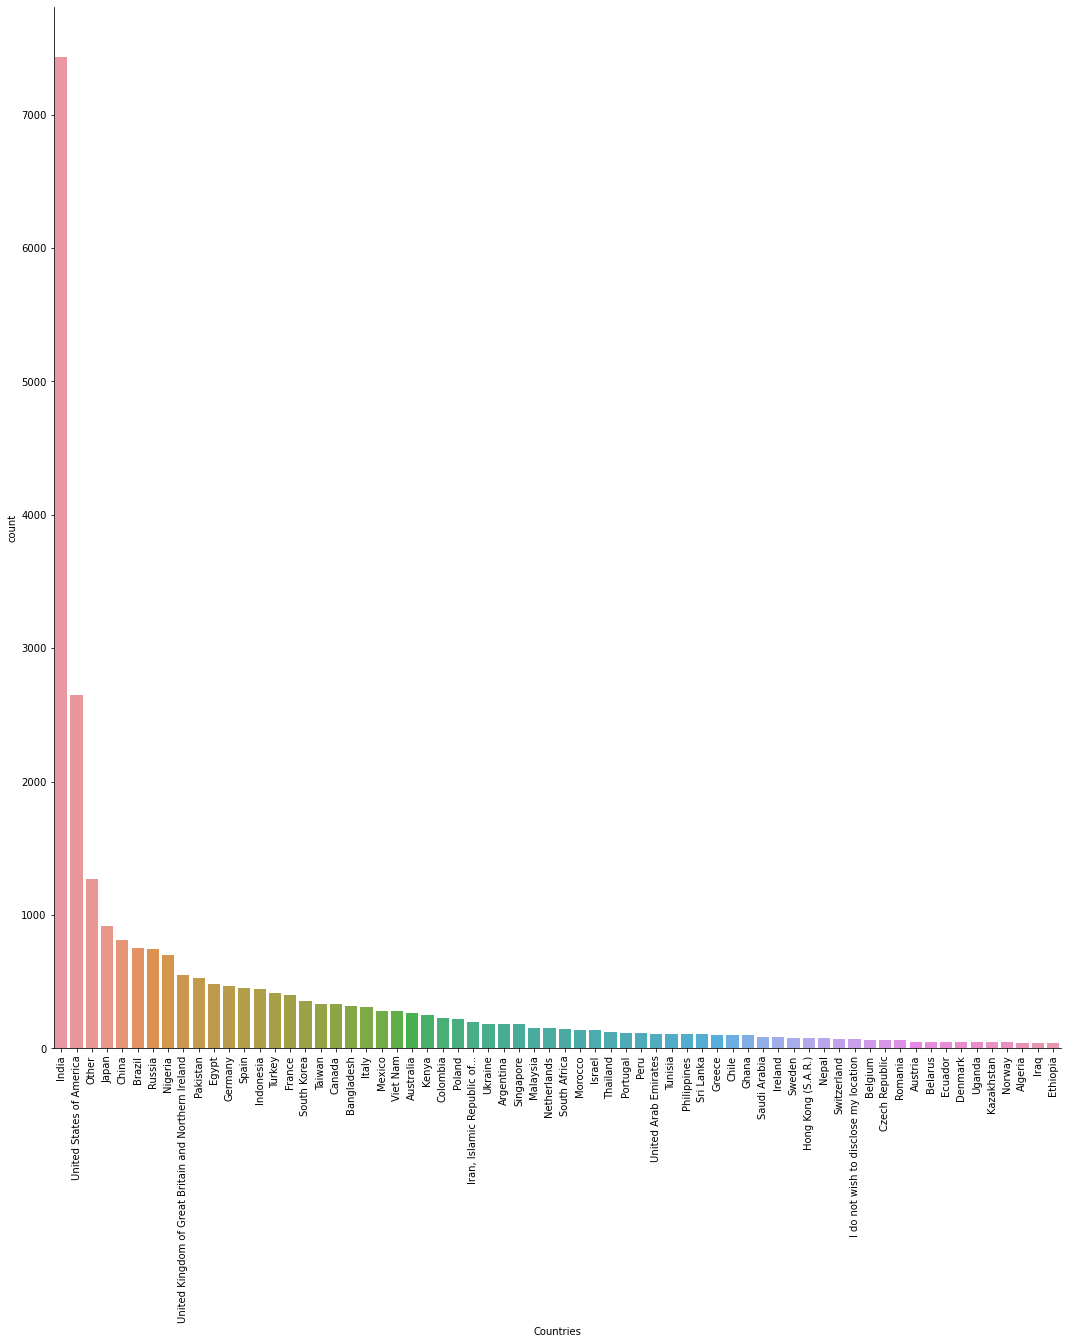

In [60]:
plotingwithouthue(df,'Q3','Countries')

### We see that the most user in INDIA 

# What is Users Degree..?

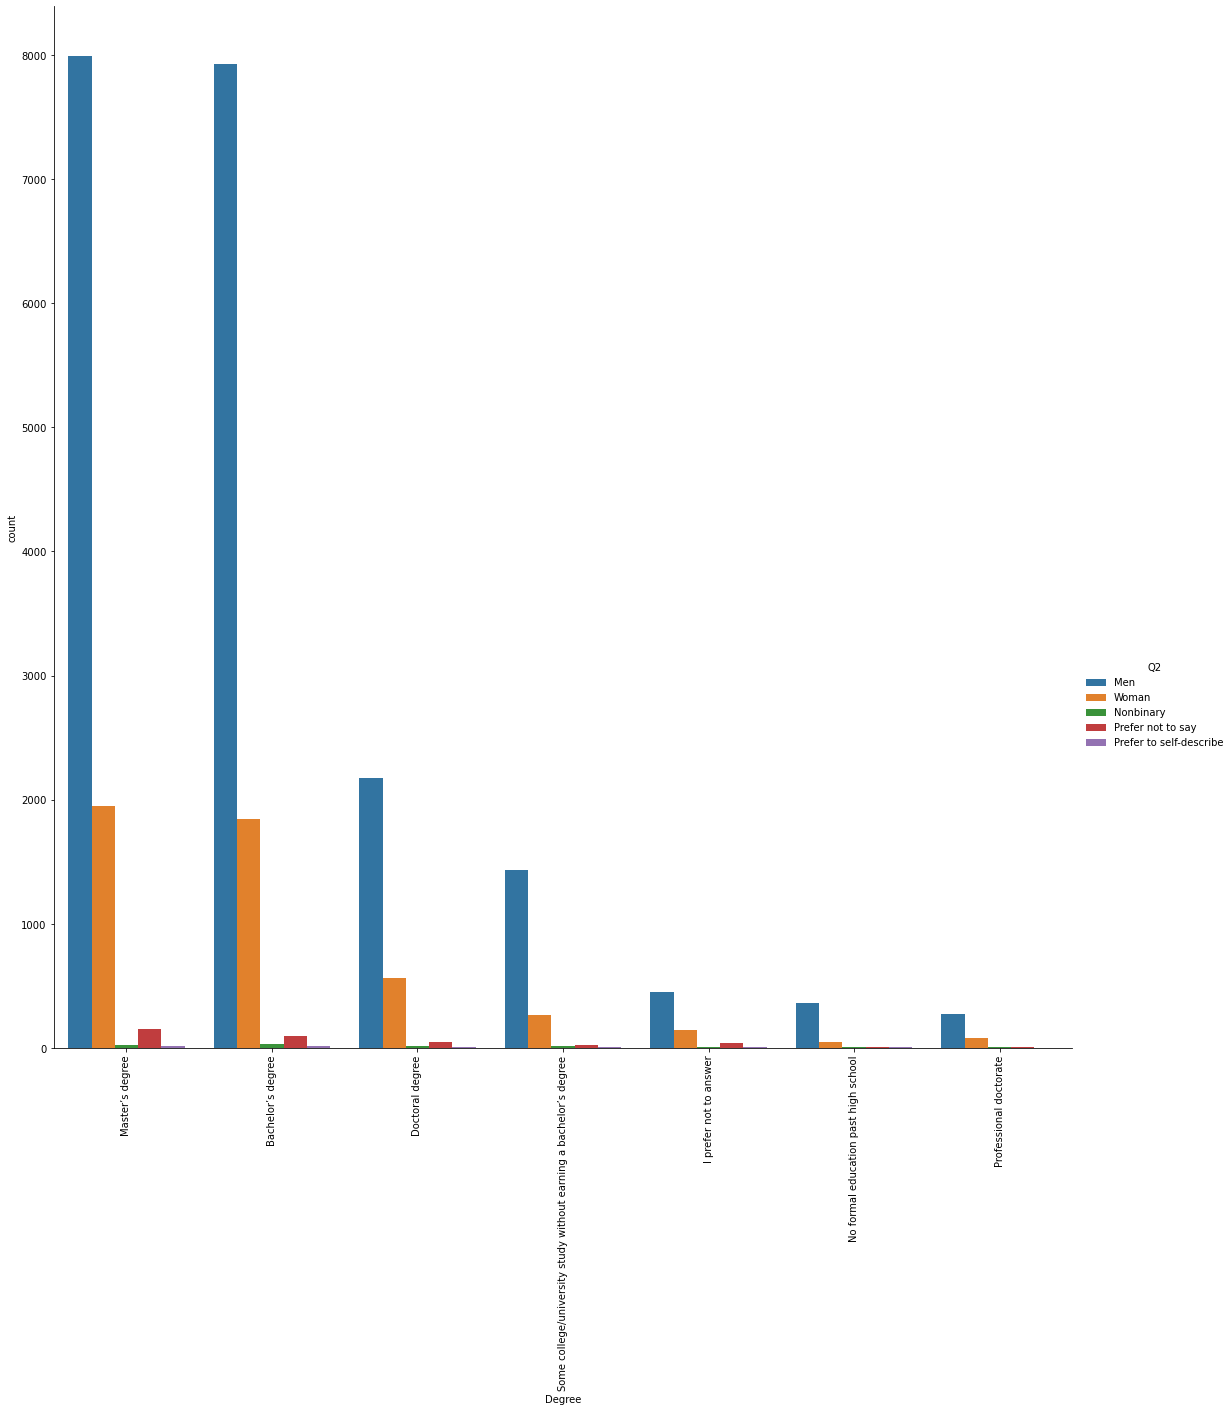

In [61]:
plotingwithhue(df,'Q4','Q2','Degree')

### We see that users with the master degree is the most

# What is the most Job in survey..?

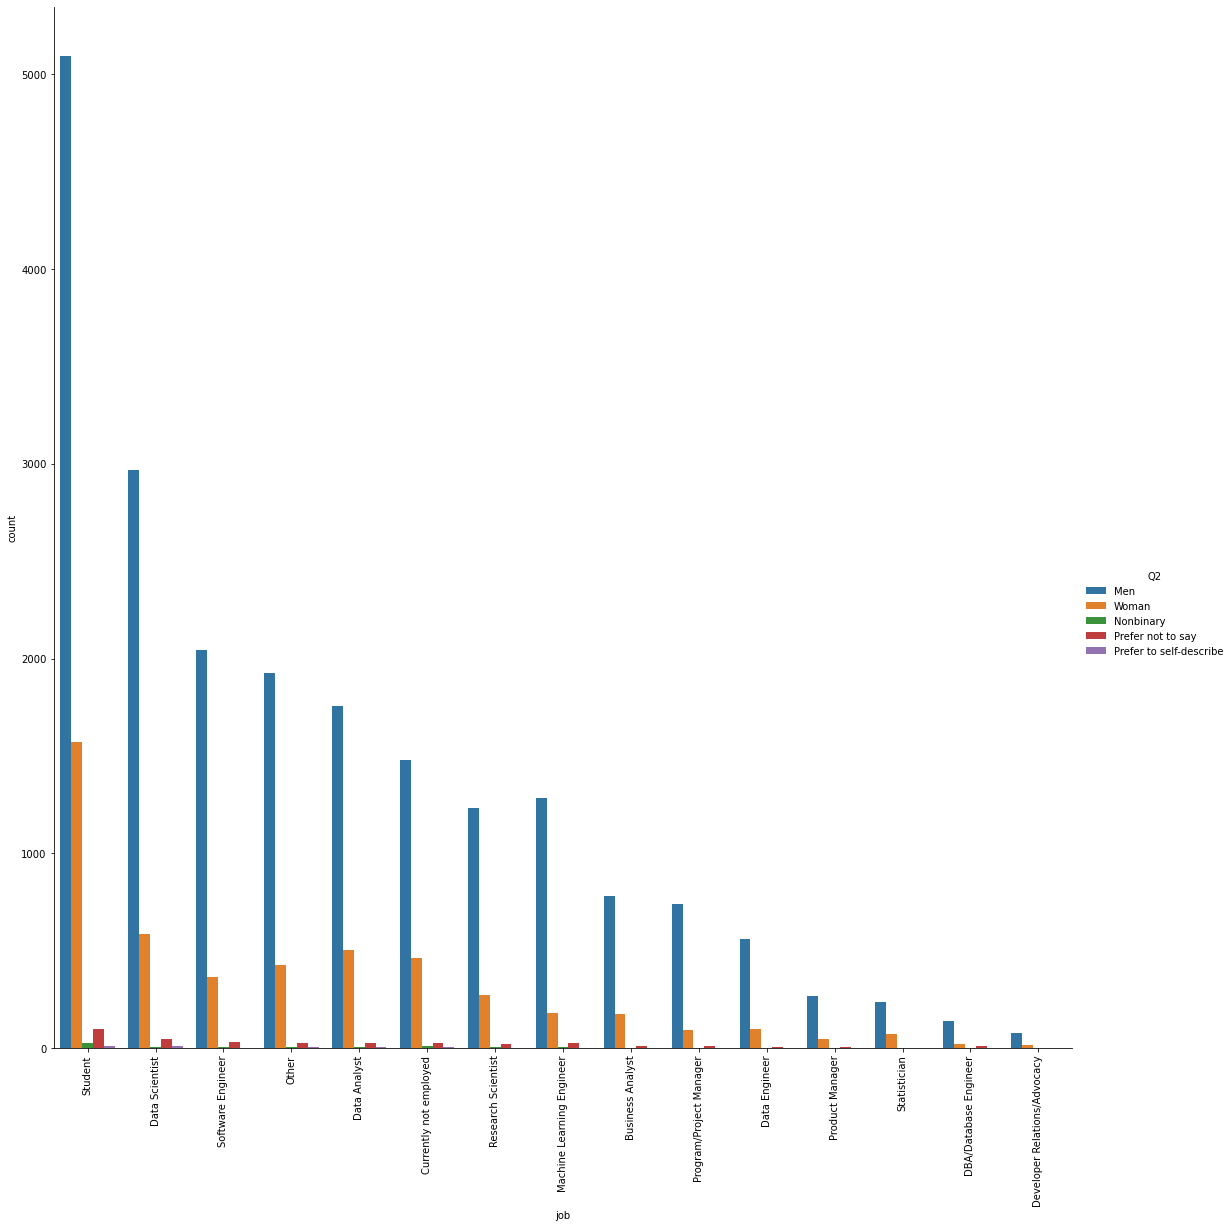

In [62]:
plotingwithhue(df,'Q5','Q2','job')

## Student is the most user in kaggle

# From What Time  User Writing Code

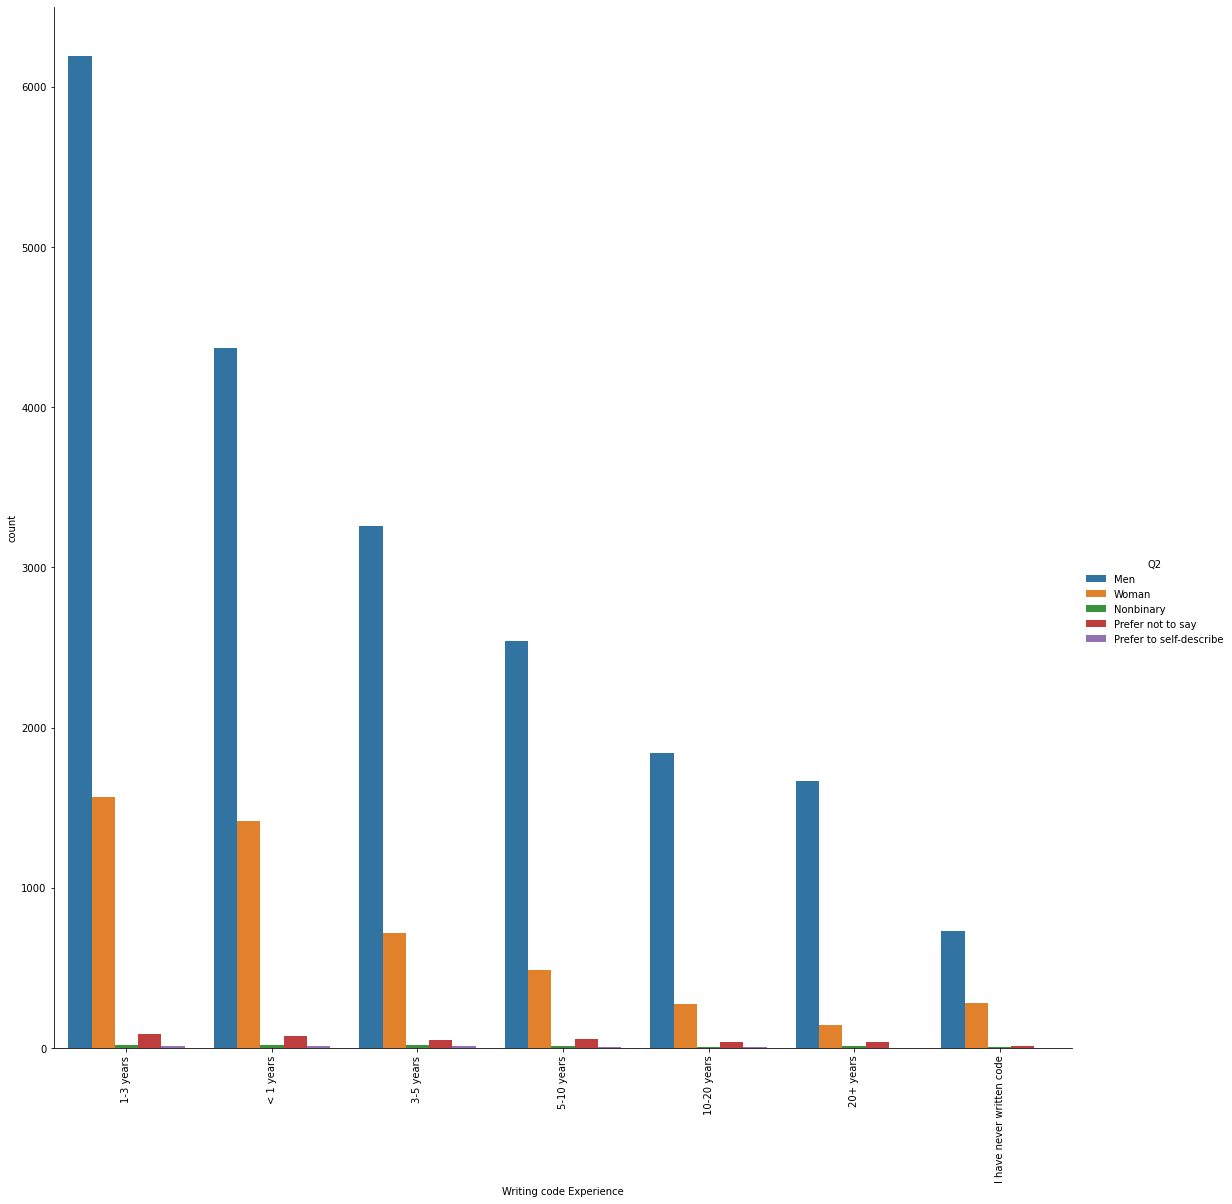

In [63]:
plotingwithhue(df,'Q6','Q2','Writing code Experience')

### We see that the most user have Experience in writing code from 1 to 3 years

we will create a function to count values because the answer of one question is divide by multi columsn so the function take two parameters data frame and columns name and will return two lisst first is the all answers vlaue for question and the second list is the count of each answer

In [64]:
def count_column_value(dataframe,columns):
    key=[]
    value=[]
    for i in Q7_cols:
        key.append(df[i].value_counts().index[0])
        value.append(df[i].value_counts(ascending=True)[0])
    return key,value

we will make a new data frame and then pass the two lists 

In [65]:
Q7_cols =['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6',
'Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11','Q7_Part_12','Q7_OTHER']
keys,values = count_column_value(df,Q7_cols)
languages = pd.DataFrame({'Language':keys,'Count':values})
languages= languages.sort_values('Count',ascending=False).reset_index(drop=True)
languages

,Language,Count
0,Python,21860
1,SQL,10756
2,C++,5535
3,R,5334
4,Java,4769
5,C,4709
6,Javascript,4332
7,MATLAB,2935
8,Other,2575
9,Bash,2216


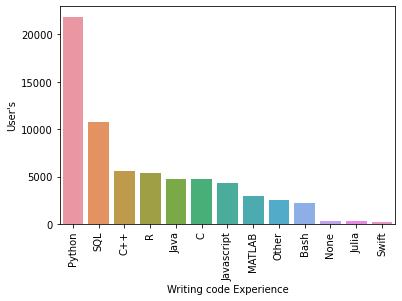

In [66]:
sns.barplot(data=languages,x='Language',y='Count')
plt.xlabel("Writing code Experience")
plt.ylabel('User\'s')
plt.xticks(rotation=90)
plt.show()

### here we are after plot the new data frame and sort values Python is the Most programming Language in the Survey

0.5


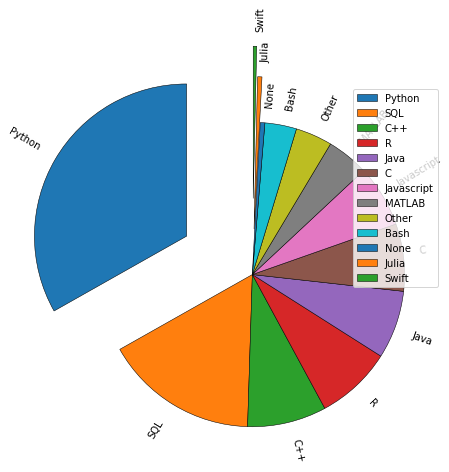

In [81]:
# pie chat about Programming language in Survey

wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
x =np.zeros(13)
x[0]=.5
x[-1]=.5
x[-2]=.3
print(x[0])
fig , ax =plt.subplots(figsize =(10, 7))
ax.pie(x=languages['Count'],
       labels=languages['Language'],
       startangle = 90,rotatelabels=True,
       wedgeprops = wp,
       explode=x)
ax.legend(loc='upper right')
plt.show()


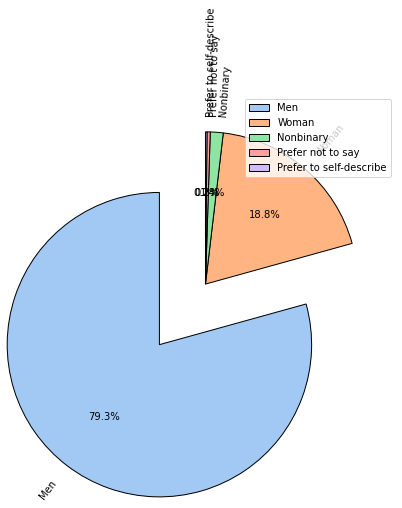

In [80]:
# pie chat about Gender in Survey
color = sns.color_palette('pastel')[0:5]
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
label= ['Men', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe']
fig , ax =plt.subplots(figsize =(10, 7))
ax.pie(x=df['Q2'].value_counts(),
       labels=label,autopct='%1.1f%%',
       startangle = 90,rotatelabels=True,
       colors=color,
       wedgeprops = wp,explode=(.5,0,0,0,0))
ax.legend(loc='upper right')
plt.show()